### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [1]:
pip install seaborn


You should consider upgrading via the 'C:\Users\gurej\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install lxml


You should consider upgrading via the 'C:\Users\gurej\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install html5lib

You should consider upgrading via the 'C:\Users\gurej\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



In [4]:
# Write Your Code Below
# Import all libraries in this cell
import lxml
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Save the data to a DataFrame object.
from urllib.request import urlopen
import re

url = "https://covid19.ncdc.gov.ng"
ncdc_covid19_data = pd.read_html(url)[0]


### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [6]:
#[Write Your Code Here]
from urllib.request import urlretrieve
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
urlretrieve(url, "time_series_covid19_confirmed_global.csv")
global_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')


In [7]:
from urllib.request import urlretrieve
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
urlretrieve(url, "time_series_covid19_recovered_global.csv")
global_recovered = pd.read_csv("time_series_covid19_recovered_global.csv")

In [8]:
from urllib.request import urlretrieve
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
urlretrieve(url, "time_series_covid19_deaths_global.csv")
global_deaths = pd.read_csv("time_series_covid19_deaths_global.csv")

### C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [9]:
#[Write Your Code Here]
covid_external = pd.read_csv("covid_external.csv")
budget_data = pd.read_csv("Budget data.csv")
real_gdp = pd.read_csv("RealGDP.csv")

### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

In [10]:
#[Write Your Code Here]
print(ncdc_covid19_data.head())
print(ncdc_covid19_data.info())

  States Affected  No. of Cases (Lab Confirmed)  No. of Cases (on admission)  \
0           Lagos                         57950                          521   
1             FCT                         19703                          459   
2         Plateau                          9030                            6   
3          Kaduna                          8985                           32   
4          Rivers                          6996                           41   

   No. Discharged  No. of Deaths  
0           56990            439  
1           19080            164  
2            8967             57  
3            8888             65  
4            6854            101  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)

In [11]:
print(global_confirmed)
print(global_confirmed.info())

    Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
269            NaN             Vietnam  14.058324  108.277199        0   
270            NaN  West Bank and Gaza  31.952200   35.233200        0   
271            NaN               Yemen  15.552727   48.516388        0   
272            NaN              Zambia -13.133897   27.849332        0   
273            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/31/21  4/1/21  \
0          0        0        0       

In [12]:
print(global_recovered.head())
print(global_recovered.info())

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  3/31/21  4/1/21  4/2/21  4/3/21  \
0        0        0        0        0  ...    51550   51788   51798   51802   
1        0        0        0        0  ...    91271   91875   92500   93173   
2        0        0        0        0  ...    81538   81632   81729   81813   
3        0        0        0        0  ...    11315   11365   11401   11428   
4        0        0        0        0  ...    20493   20508   20867   20871   

   4/4/21  4/5/21  4/6/21  4/7/21  4/8/21  4/9/21  
0   51885   51902   51928   

In [13]:
print(global_deaths.head())
print(global_deaths.info())

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  3/31/21  4/1/21  4/2/21  4/3/21  \
0        0        0        0        0  ...     2484    2489    2495    2496   
1        0        0        0        0  ...     2235    2241    2247    2256   
2        0        0        0        0  ...     3093    3096    3099    3102   
3        0        0        0        0  ...      115     115     116     117   
4        0        0        0        0  ...      537     538     538     540   

   4/4/21  4/5/21  4/6/21  4/7/21  4/8/21  4/9/21  
0    2497    2508    2512   

In [14]:
print(covid_external.head())
print(covid_external.info())

      states         region  Population  Overall CCVI Index  Age  \
0        FCT  North Central     4865000                 0.3  0.0   
1    Plateau  North Central     4766000                 0.4  0.5   
2      Kwara  North Central     3524000                 0.3  0.4   
3  Nassarawa  North Central     2783000                 0.1  0.3   
4      Niger  North Central     6260000                 0.6  0.0   

   Epidemiological  Fragility  Health System  Population Density  \
0              0.9        0.4            0.6                 0.9   
1              0.4        0.8            0.3                 0.3   
2              0.3        0.2            0.4                 0.2   
3              0.5        0.9            0.0                 0.1   
4              0.6        0.3            0.7                 0.1   

   Socio-Economic   Transport Availability  Acute IHR  
0             0.6                      0.2       0.79  
1             0.5                      0.3       0.93  
2             

In [15]:
print(budget_data.head())
print(budget_data.info())

      states  Initial_budget (Bn)  Revised_budget (Bn)
0       Abia               136.60               102.70
1    Adamawa               183.30               139.31
2  Akwa-Ibom               597.73               366.00
3    Anambra               137.10               112.80
4     Bauchi               167.20               128.00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes
None


In [16]:
print(real_gdp.head())
print(real_gdp.info())

   Year           Q1           Q2           Q3           Q4
0  2014  15438679.50  16084622.31  17479127.58  18150356.45
1  2015  16050601.38  16463341.91  17976234.59  18533752.07
2  2016  15943714.54  16218542.41  17555441.69  18213537.29
3  2017  15797965.83  16334719.27  17760228.17  18598067.07
4  2018  16096654.19  16580508.07  18081342.10  19041437.59
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes
None


### Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

TODO A - Clean the scraped data

In [17]:
#RENAMING COLUMNS FROM THE NCDC DATA

new_columns={"States Affected": "states","No. of Cases (Lab Confirmed)": "Lab Confirmed Cases",
"No. of Cases (on admission)": "Admitted Cases",
"No. Discharged": "Discharged Cases",
"No. of Deaths": "Death Cases"}

ncdc_covid19_data.rename(columns=new_columns, inplace=True)
ncdc_covid19_data.head()

,states,Lab Confirmed Cases,Admitted Cases,Discharged Cases,Death Cases
0,Lagos,57950,521,56990,439
1,FCT,19703,459,19080,164
2,Plateau,9030,6,8967,57
3,Kaduna,8985,32,8888,65
4,Rivers,6996,41,6854,101


In [18]:
#DELETING UNNECESSARY COLUMNS FROM JOHN HOPKINS DATA

columns_to_drop = ["Province/State", "Lat", "Long"]

global_confirmed.drop(columns = columns_to_drop, inplace = True)
global_recovered.drop(columns = columns_to_drop, inplace = True)
global_deaths.drop(columns = columns_to_drop, inplace = True)

global_confirmed.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,56454,56517,56572,56595,56676,56717,56779,56873,56943,57019
1,Albania,0,0,0,0,0,0,0,0,0,...,125157,125506,125842,126183,126531,126795,126936,127192,127509,127795
2,Algeria,0,0,0,0,0,0,0,0,0,...,117192,117304,117429,117524,117622,117739,117879,118004,118116,118251
3,Andorra,0,0,0,0,0,0,0,0,0,...,12010,12053,12115,12174,12231,12286,12328,12363,12409,12456
4,Angola,0,0,0,0,0,0,0,0,0,...,22311,22399,22467,22579,22631,22717,22885,23010,23108,23242


In [19]:
#RENAMING COLUMNS FROM JOHN HOPKINS DATA

column_rename = {"Country/Region": "Country"}

global_confirmed.rename(columns = column_rename, inplace = True)
global_recovered.rename(columns = column_rename, inplace = True)
global_deaths.rename(columns = column_rename, inplace = True)

global_deaths.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,2484,2489,2495,2496,2497,2508,2512,2512,2516,2521
1,Albania,0,0,0,0,0,0,0,0,0,...,2235,2241,2247,2256,2265,2274,2283,2291,2297,2304
2,Algeria,0,0,0,0,0,0,0,0,0,...,3093,3096,3099,3102,3105,3108,3112,3116,3119,3123
3,Andorra,0,0,0,0,0,0,0,0,0,...,115,115,116,117,117,117,117,119,120,120
4,Angola,0,0,0,0,0,0,0,0,0,...,537,538,538,540,542,543,547,547,549,549


TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [20]:
#DAILY CONFIRMED CASES IN NIGERIA

df1 = global_confirmed[global_confirmed["Country"] == "Nigeria"]

columns_to_use = df1.iloc[:, 4:]

daily_confirmed_nigeria = df1.melt(value_vars=columns_to_use, var_name="Date", value_name="Cases")
daily_confirmed_nigeria["Date"] = pd.to_datetime(daily_confirmed_nigeria["Date"])

print(daily_confirmed_nigeria)


          Date   Cases
0   2020-01-25       0
1   2020-01-26       0
2   2020-01-27       0
3   2020-01-28       0
4   2020-01-29       0
..         ...     ...
436 2021-04-05  163330
437 2021-04-06  163388
438 2021-04-07  163498
439 2021-04-08  163581
440 2021-04-09  163652

[441 rows x 2 columns]


TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [21]:
#DAILY RECOVERED CASES IN NIGERIA

df2 = global_recovered[global_recovered["Country"] == "Nigeria"]

columns_to_use = df1.iloc[:, 4:]

daily_recovered_nigeria = df2.melt(value_vars=columns_to_use, var_name="Date", value_name="Cases")
daily_recovered_nigeria["Date"] = pd.to_datetime(daily_recovered_nigeria["Date"])

print(daily_recovered_nigeria)

          Date   Cases
0   2020-01-25       0
1   2020-01-26       0
2   2020-01-27       0
3   2020-01-28       0
4   2020-01-29       0
..         ...     ...
436 2021-04-05  152045
437 2021-04-06  153630
438 2021-04-07  153788
439 2021-04-08  154005
440 2021-04-09  154073

[441 rows x 2 columns]


TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [22]:
#DAILY DEATH CASES IN NIGERIA

df3 = global_deaths[global_deaths["Country"] == "Nigeria"]

columns_to_use = df1.iloc[:, 4:]

daily_deaths_nigeria = df3.melt(value_vars=columns_to_use, var_name="Date", value_name="Cases")
daily_deaths_nigeria["Date"] = pd.to_datetime(daily_deaths_nigeria["Date"])

print(daily_deaths_nigeria)

          Date  Cases
0   2020-01-25      0
1   2020-01-26      0
2   2020-01-27      0
3   2020-01-28      0
4   2020-01-29      0
..         ...    ...
436 2021-04-05   2058
437 2021-04-06   2058
438 2021-04-07   2058
439 2021-04-08   2058
440 2021-04-09   2059

[441 rows x 2 columns]


### Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary. 
<br>
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary 

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

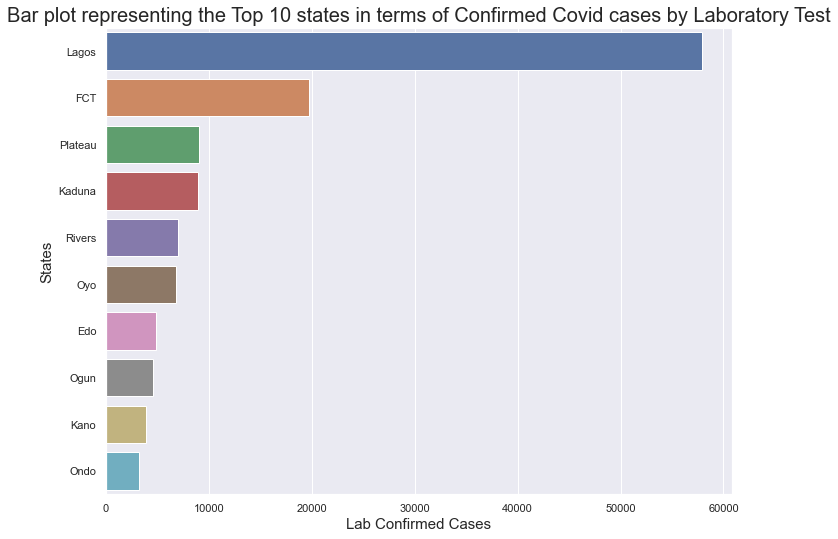

In [23]:
top1 = ncdc_covid19_data.sort_values("Lab Confirmed Cases", ascending=False).head(10)

#Setting Style, Palette and Plot Size
sns.set_style("darkgrid")
sns.set_palette("Reds")
sns.set(rc={'figure.figsize':(10,8)})

#Creating plot
ax=sns.barplot(x="Lab Confirmed Cases", y="states",data=top1)

#Customizing Title and Adding Labels
ax.set_title("Bar plot representing the Top 10 states in terms of Confirmed Covid cases by Laboratory Test", fontsize=20)
ax.set_xlabel("Lab Confirmed Cases", fontsize=15)
ax.set_ylabel("States", fontsize=15)

plt.show()

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

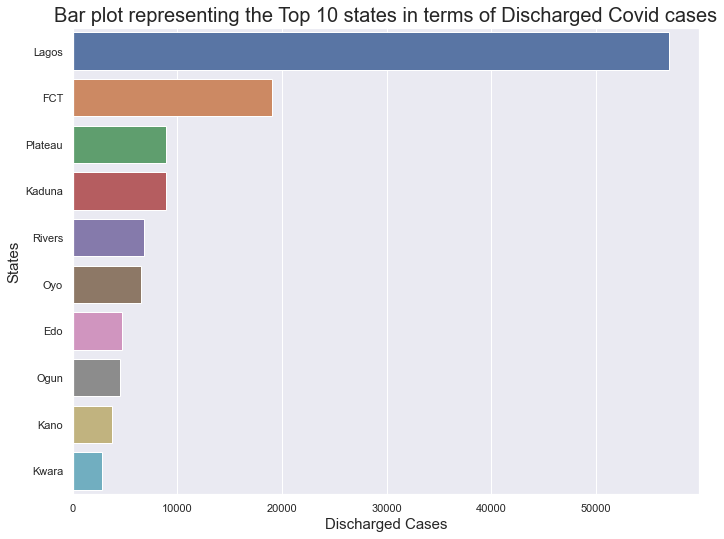

In [24]:
top2 = ncdc_covid19_data.sort_values("Discharged Cases", ascending=False).head(10)

#Setting Style, Palette and Plot Size
sns.set_style("darkgrid")
sns.set_palette("Blues")
sns.set(rc={'figure.figsize':(10,8)})

#Creating plot
ax=sns.barplot(x="Discharged Cases", y="states",data=top2)

#Customizing Title and Adding Labels
ax.set_title("Bar plot representing the Top 10 states in terms of Discharged Covid cases", fontsize=20)
ax.set_xlabel("Discharged Cases", fontsize=15)
ax.set_ylabel("States", fontsize=15)

plt.show()

TODO D - Plot the top 10 Death cases

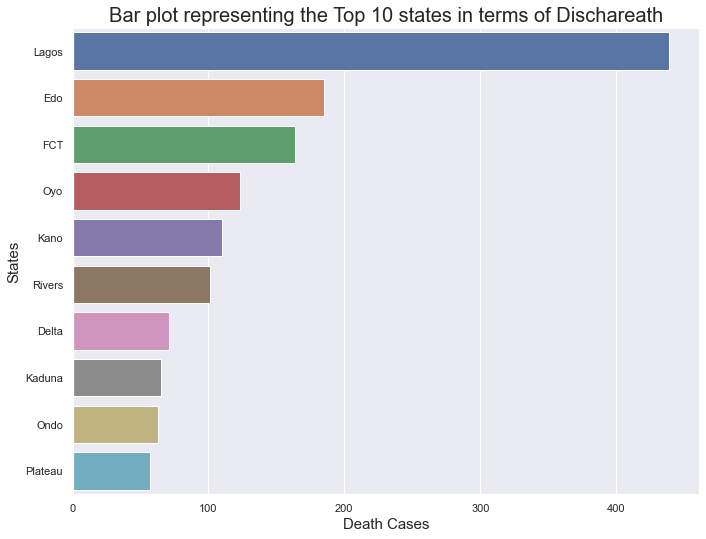

In [35]:
top3 = ncdc_covid19_data.sort_values("Death Cases", ascending=False).head(10)

#Setting Style, Palette and Plot Size
sns.set_style("darkgrid")
sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
sns.set(rc={'figure.figsize':(10,8)})

#Creating plot
ax=sns.barplot("Death Cases", "states",data=top3)

#Customizing Title and Adding Labels
ax.set_title("Bar plot representing the Top 10 states in terms of Dischareath", fontsize=20)
ax.set_xlabel("Death Cases", fontsize=15)
ax.set_ylabel("States", fontsize=15)

plt.show()

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

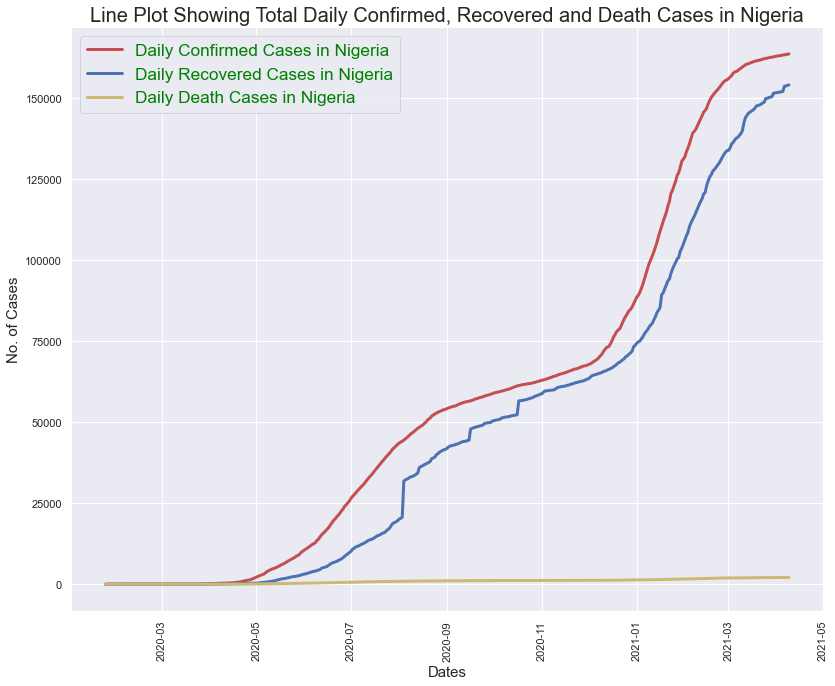

In [26]:
#Setting Style and Plot Size
sns.set_style("dark")
sns.set(rc={'figure.figsize':(12,10)})

#Creating plots
sns.lineplot(daily_confirmed_nigeria.Date, daily_confirmed_nigeria.Cases,linewidth=3, label="Daily Confirmed Cases in Nigeria", color="r", markers="o")

sns.lineplot(daily_recovered_nigeria.Date, daily_recovered_nigeria.Cases,linewidth=3, label="Daily Recovered Cases in Nigeria", color="b")

sns.lineplot(daily_deaths_nigeria.Date, daily_deaths_nigeria.Cases,linewidth=3, label="Daily Death Cases in Nigeria", color="y")

#Customizing Title and Adding Labels,Legend
plt.xlabel("Dates", fontsize=15)
plt.ylabel("No. of Cases", fontsize=15)
plt.xticks(rotation=90)
plt.title ("Line Plot Showing Total Daily Confirmed, Recovered and Death Cases in Nigeria", fontsize=20)
plt.legend(fontsize='x-large',labelcolor="green")

plt.show()

TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

In [27]:
#Determining the Dauly Infection Rate

daily_confirmed_nigeria["Cases"].diff()

0        NaN
1        0.0
2        0.0
3        0.0
4        0.0
       ...  
436    135.0
437     58.0
438    110.0
439     83.0
440     71.0
Name: Cases, Length: 441, dtype: float64

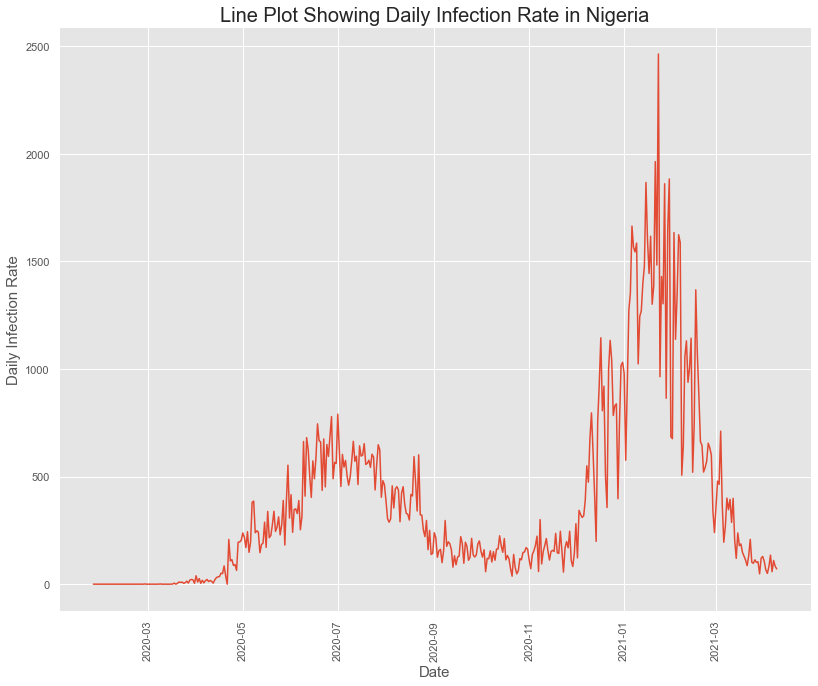

In [28]:
#Setting Style
plt.style.use("ggplot")

#Creating plot
plt.plot(daily_confirmed_nigeria.Date, daily_confirmed_nigeria["Cases"].diff())

#Customizing Title and adding labels
plt.xlabel("Date", fontsize=15)
plt.ylabel("Daily Infection Rate", fontsize=15)
plt.xticks(rotation=90)
plt.title("Line Plot Showing Daily Infection Rate in Nigeria", fontsize=20)

plt.show()

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

In [29]:
#Calculaing Maximum Infection Rate
daily_confirmed_nigeria["Daily Infection Rate"] = daily_confirmed_nigeria["Cases"].diff()
max_infection_rate = daily_confirmed_nigeria["Daily Infection Rate"].max()

#Finding the date of maximum infection
max_infection_date = daily_confirmed_nigeria.loc[(daily_confirmed_nigeria["Daily Infection Rate"] == max_infection_rate), "Date"]

print("The maximum infection rate for a day (Number of new cases) \n", max_infection_rate)
print ("The date of maximum infection rate [Number of new cases] \n", max_infection_date)


The maximum infection rate for a day (Number of new cases) 
 2464.0
The date of maximum infection rate [Number of new cases] 
 364   2021-01-23
Name: Date, dtype: datetime64[ns]


TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

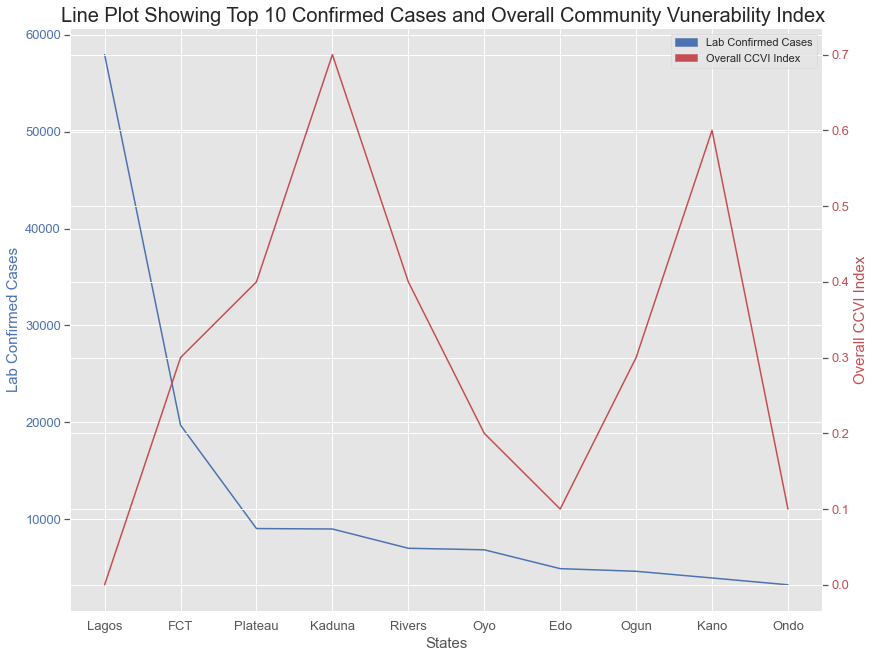

In [33]:
import matplotlib.patches as mpatches
#Combining the two datasets: ncdc_covid_19_data AND covid_external
ncdc_covid_external = ncdc_covid19_data.merge(covid_external, on="states")

#Creating a new dataframe of top 10 states in terms of confirmed cases
ncdc_covid_largest = ncdc_covid_external.nlargest(10,["Lab Confirmed Cases"])

#Setting style and figsize
plt.style.use("ggplot")
fig = plt.figure(figsize = (12, 10))
ax1 = fig.add_subplot(111)

#Creating plots
ax1.plot(ncdc_covid_largest["states"], ncdc_covid_largest["Lab Confirmed Cases"], color="b")
ax1.set_ylabel("Lab Confirmed Cases", color="b", fontsize=15)

ax2 = ax1.twinx()
ax2.plot(ncdc_covid_largest["states"], ncdc_covid_largest["Overall CCVI Index"], "r-")

#Customizing labels and title
ax2.set_ylabel("Overall CCVI Index", color="r", fontsize=15)
for tl in ax1.get_yticklabels():
    tl.set_color('b')


for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.xticks(rotation=90)
plt.title("Line Plot Showing Top 10 Confirmed Cases and Overall Community Vunerability Index ", fontsize=20)
ax1.set_xlabel("States", fontsize=15)
plt.setp(ax1.get_xticklabels(), fontsize=13)
plt.setp(ax1.get_yticklabels(), fontsize=13)
plt.setp(ax2.get_yticklabels(), fontsize=13)

#Adding legend
blue_patch = mpatches.Patch(color='b', label="Lab Confirmed Cases")
red_patch = mpatches.Patch(color='r', label="Overall CCVI Index")

plt.legend(handles=[blue_patch, red_patch],loc="best")

plt.show() 



OBSERVATIONS

This line plot shows the top 10 states with Confirmed COVID19 Cases and their Overall Community Vunerability Index (CCVI).
From the plot, the following observations are deduced:

1. Lagos state, which has the highest number of COVID19 cases, actually has the lowest Overall CCVI Index of 0.0, in other words, it is the least vunerable to COVID19 with all factors (like age, fragility, etc.,) being considered.

2. Edo and Ondo states both have a low Overall CCVI Index of 0.1.

3. The rest of the states have a higher Overall CCVI Index compared to Lagos, Edo and Ondo, with Kaduna and Kano having the highest CCVI Index of 0.7 and 0.6 respectively, meaning they are highly vunerable to COVID19, suffice to say, this two states have earned their spots at the top 10 states with Confirmed COVID19 Cases.

    Although the same cannot be said about Lagos, Edo and Ondo, which begs the question:
    
 Why would states with very low Overall CCVI Index be among the top 10 states with Confirmed COVID19 Cases????

TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.
Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
* Provide a summary of your observation

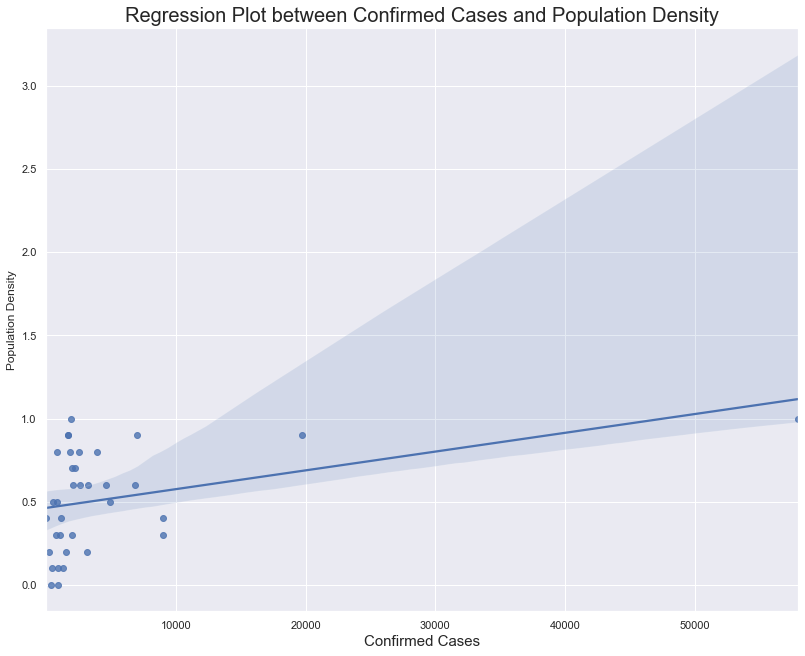

In [47]:
# Setting style and plot size
sns.set_style("dark")
sns.set(rc={'figure.figsize':(12,10)})

# Creating plot
ax = sns.regplot(x="Lab Confirmed Cases", y="Population Density", data=ncdc_covid_external)

#Customizing title and labels
ax.set_title("Regression Plot between Confirmed Cases and Population Density", fontsize=20)
ax.set_xlabel("Confirmed Cases", fontsize=15)
ax.set_ylabel("Population Density")

plt.show()

OBSERVATIONS

This regression plot shows the linear relationship between all Confirmed Cases in the states and their Population Density.

TODO J - 
* Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
* Provide a detailed summary of your findings. 
* Note that you can have as many as possible.

EXTENDING ANALYSIS...

In [47]:
# Calculating Minimum Infection Rate
min_infection_rate = daily_confirmed_nigeria["Daily Infection Rate"].min()

#Finding dates of minimum infection
min_infection_date = daily_confirmed_nigeria.loc[(daily_confirmed_nigeria["Daily Infection Rate"] == min_infection_rate), "Date"]

print("The minimum infection rate for a day (Number of new cases) \n", min_infection_rate)
print ("The date of minimum infection rate [Number of new cases] \n", min_infection_date)

The minimum infection rate for a day (Number of new cases) 
 0.0
The date of minimum infection rate [Number of new cases] 
 1    2020-01-26
2    2020-01-27
3    2020-01-28
4    2020-01-29
5    2020-01-30
6    2020-01-31
7    2020-02-01
8    2020-02-02
9    2020-02-03
10   2020-02-04
11   2020-02-05
12   2020-02-06
13   2020-02-07
14   2020-02-08
15   2020-02-09
16   2020-02-10
17   2020-02-11
18   2020-02-12
19   2020-02-13
20   2020-02-14
21   2020-02-15
22   2020-02-16
23   2020-02-17
24   2020-02-18
25   2020-02-19
26   2020-02-20
27   2020-02-21
28   2020-02-22
29   2020-02-23
30   2020-02-24
31   2020-02-25
32   2020-02-26
33   2020-02-27
35   2020-02-29
36   2020-03-01
37   2020-03-02
38   2020-03-03
39   2020-03-04
40   2020-03-05
41   2020-03-06
42   2020-03-07
43   2020-03-08
45   2020-03-10
46   2020-03-11
47   2020-03-12
48   2020-03-13
49   2020-03-14
50   2020-03-15
51   2020-03-16
54   2020-03-19
87   2020-04-21
Name: Date, dtype: datetime64[ns]


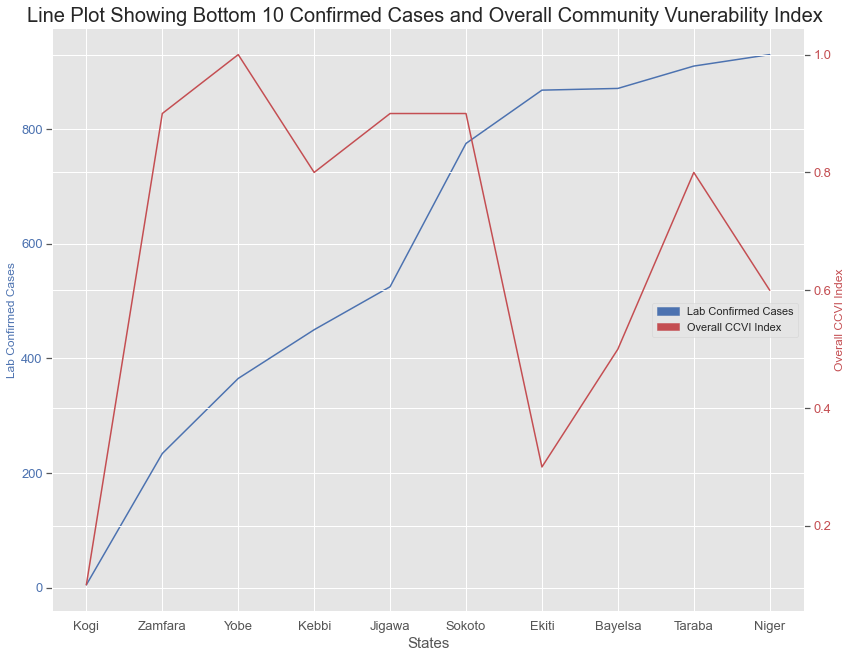

In [179]:
#Creating a new dataframe of bottom 10 states in terms of confirmed cases
ncdc_covid_bottom10 = ncdc_covid_external.sort_values("Lab Confirmed Cases", ascending=True).head(10)

#Setting style and plot size
plt.style.use("ggplot")
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(111)

#Creating plots
ax1.plot(ncdc_covid_bottom10["states"], ncdc_covid_bottom10["Lab Confirmed Cases"], color="b")
ax1.set_ylabel("Lab Confirmed Cases", color="b")

ax2 = ax1.twinx()
ax2.plot(ncdc_covid_bottom10["states"], ncdc_covid_bottom10["Overall CCVI Index"], "r-")

#Customizing labels and title
ax2.set_ylabel("Overall CCVI Index", color="r")
for tl in ax1.get_yticklabels():
    tl.set_color('b')

for tl in ax2.get_yticklabels():
    tl.set_color('r')

plt.xticks(rotation=90)
ax1.set_xlabel("States")
plt.title("Line Plot Showing Bottom 10 Confirmed Cases and Overall Community Vunerability Index ", fontsize=20)
ax1.set_xlabel("States", fontsize=15)
plt.setp(ax1.get_xticklabels(), fontsize=13)
plt.setp(ax1.get_yticklabels(), fontsize=13)
plt.setp(ax2.get_yticklabels(), fontsize=13)

#Adding legend
blue_patch = mpatches.Patch(color='b', label="Lab Confirmed Cases")
red_patch = mpatches.Patch(color='r', label="Overall CCVI Index")

plt.legend(handles=[blue_patch, red_patch],loc='right', bbox_to_anchor=(1.0, 0.5),)

plt.show() 
 

OBSERVATIONS

This line plot shows the bottom 10 states with Confirmed COVID19 Cases and their Overall Community Vunerability Index (CCVI).
From the plot, the following observations are deduced:

1. Kogi state, which has the lowest number of COVID19 cases, actually has a very low Overall CCVI Index of 0.1, in other words, it is the least vunerable to COVID19 with all factors (like age, fragility, etc.,) being considered.

2. Ekiti state also has a low Overall CCVI Index of 0.3.

3. The rest of the states have a really higher Overall CCVI Index compared to Kogi and Ekiti, with Yobe and Taraba having the highest CCVI Index of 1.0 and 0.8 respectively, meaning they are highly vunerable to COVID19, which begs the question:
    
 Why would states with very high Overall CCVI Index be among the bottom 10 states with Confirmed COVID19 Cases????

<Figure size 864x720 with 0 Axes>

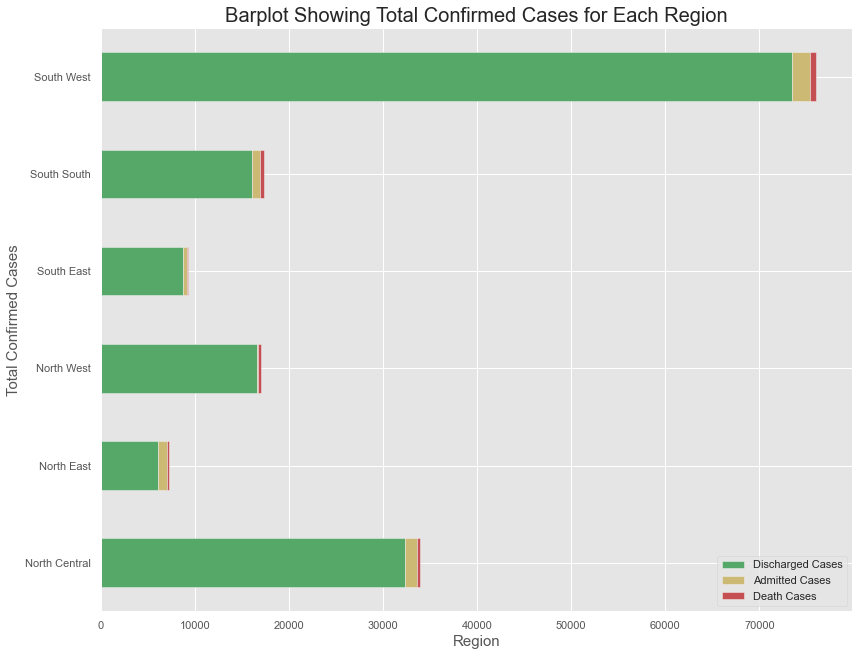

In [106]:
#Setting Style and plot size
plt.style.use("ggplot")
fig = plt.figure(figsize = (12, 10))

#Group by regions
x= ncdc_covid_external[['region','Discharged Cases','Admitted Cases','Death Cases']]
y= x.set_index('region')
z=y.groupby('region').sum()

#Creating plot
z.plot.barh(stacked=True, color=["g", "y", "r"])

#Customizing Labels and title
plt.title("Barplot Showing Total Confirmed Cases for Each Region", fontsize=20)
plt.xlabel("Region", fontsize=15)
plt.ylabel("Total Confirmed Cases", fontsize=15)

plt.show()

OBSERVATIONS

This bar chart represents the total confirmed COVID19 Cases base on Regions.

From this chart, the following deductions were made:

1. The South West region has the highest number of Confirmed COVID19 Cases which totals to 76,023 cases.

2. While the North East region has the lowest number of Confirmed COVID19 Cases which totals to 7,235 cases.

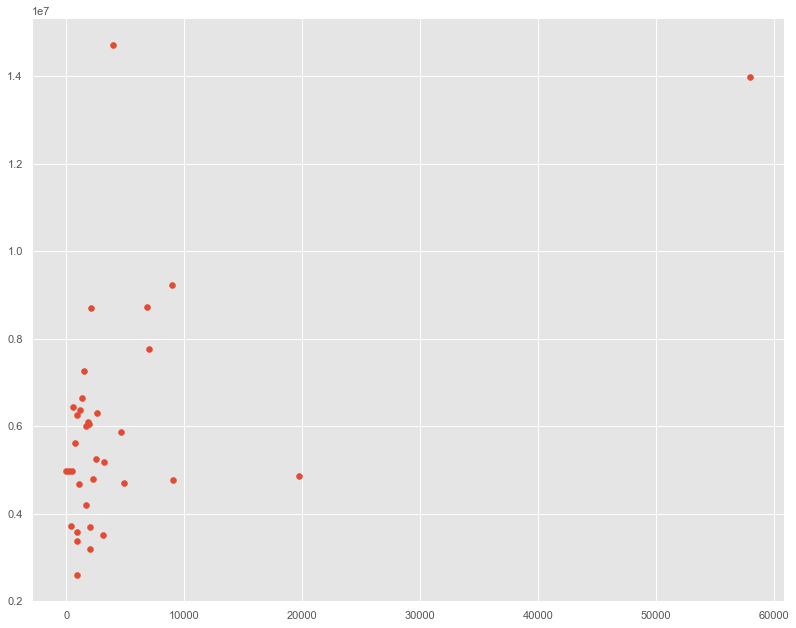

In [112]:
pop=ncdc_covid_external.loc[:,("states","Population")]
pop_list = pop.values.tolist()
pop_list
np_pop = np.array(pop_list)
temp = ncdc_covid_external.sort_values("Lab Confirmed Cases", ascending=False).head(10)
plt.scatter (ncdc_covid_external["Lab Confirmed Cases"], ncdc_covid_external["Population"])
plt.show()

### TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

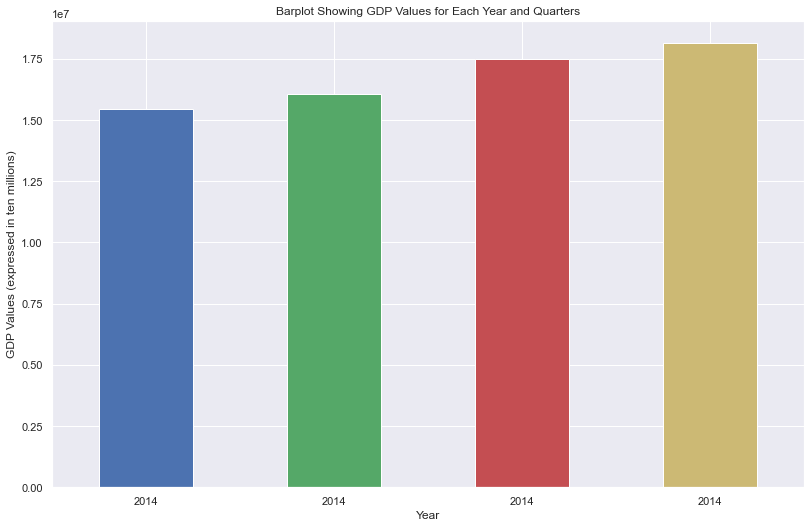

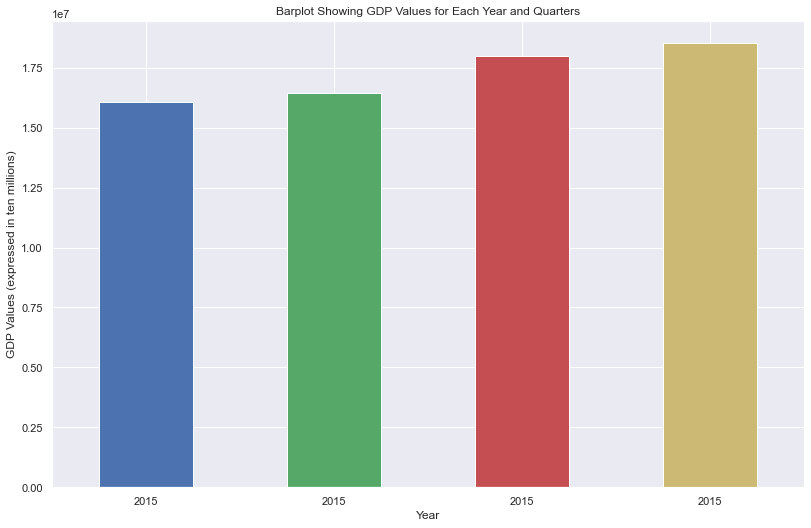

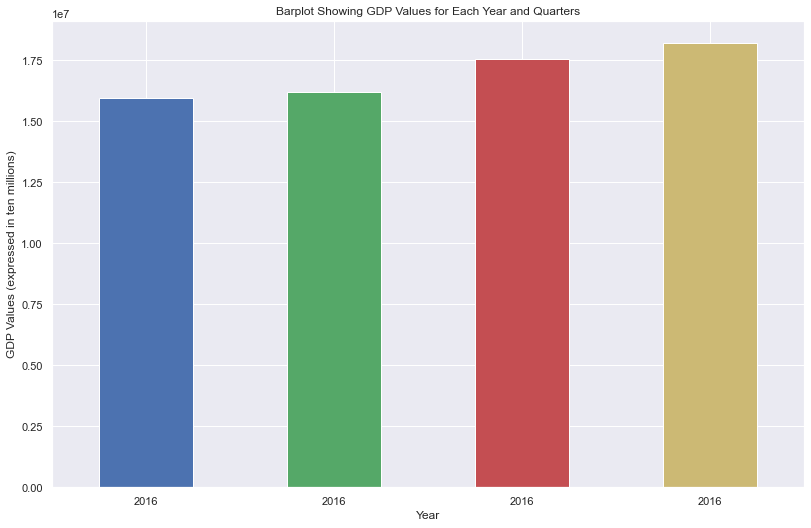

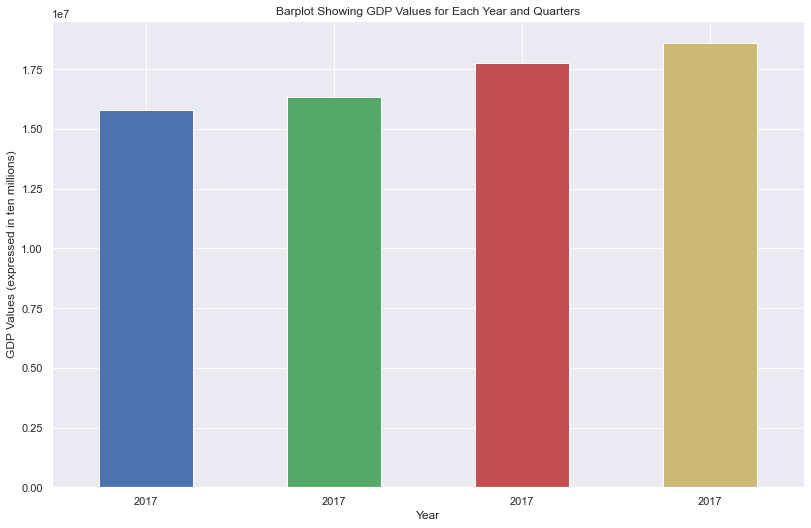

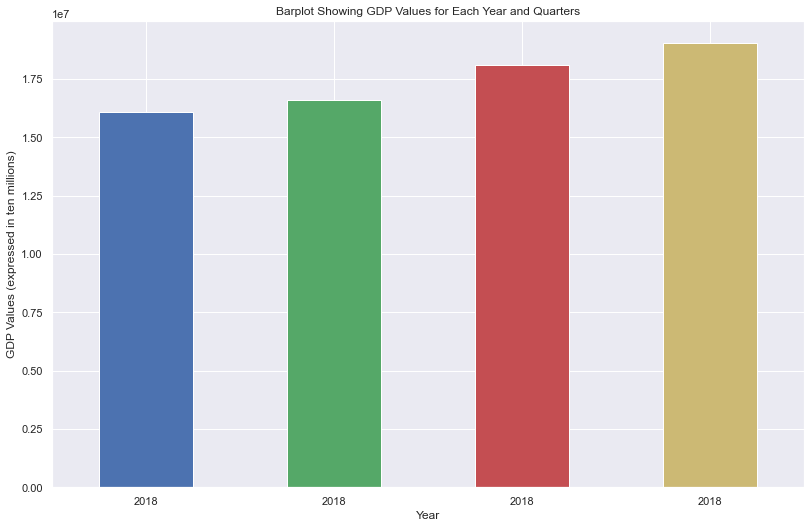

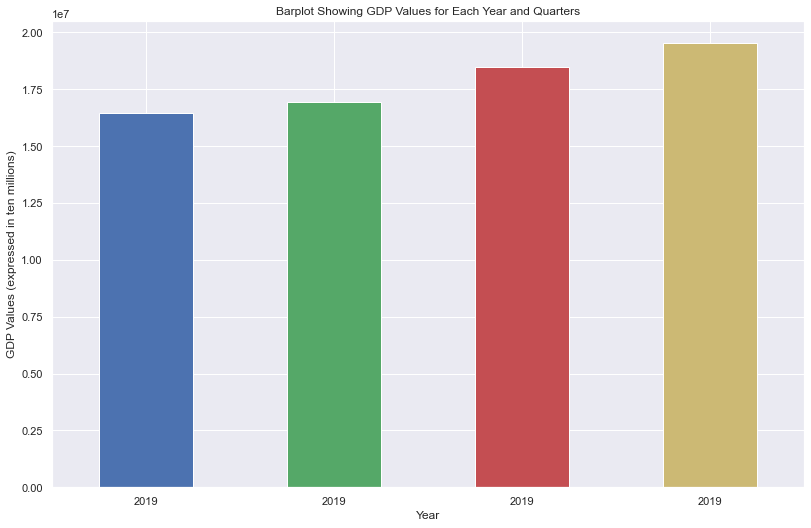

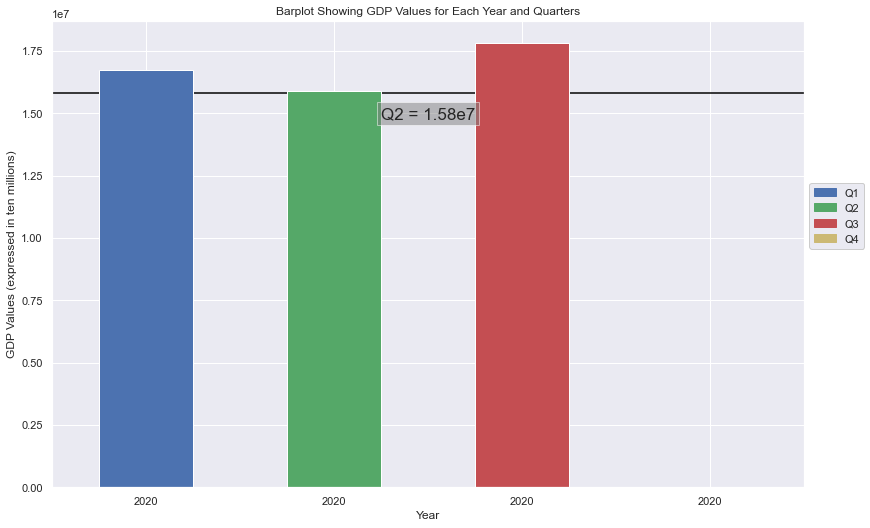

In [46]:
import matplotlib.patches as mpatches
#Melting the dataframe
real_gdp1 = real_gdp.melt(id_vars="Year", value_vars=["Q1", "Q2", "Q3", "Q4"], var_name="Quarters", value_name="GDP Value")
real_gdp2 = real_gdp1.groupby("Year")

#Creating plot
real_gdp2.plot(x = "Year", y = "GDP Value", kind="bar", title="Barplot Showing GDP Values for Each Year and Quarters", figsize = (12,8), xlabel="Year", ylabel="GDP Values (expressed in ten millions)", color=["b", "g", "r", "y"], legend=False, rot=0, zorder=2)

#Creating axhline
plt.axhline(y=1.58e7, linewidth=1.5, zorder=1,color="black")
plt.annotate(text="Q2 = 1.58e7", xy=(1.25, 1.48e7), fontsize=17, xycoords="data", bbox=dict(facecolor="gray",alpha=0.5))

#Setting legend
blue_patch = mpatches.Patch(color='b', label='Q1')
green_patch = mpatches.Patch(color='g', label='Q2')
red_patch = mpatches.Patch(color='r', label='Q3')
yellow_patch = mpatches.Patch(color='y', label='Q4')

plt.legend(handles=[blue_patch, green_patch, red_patch, yellow_patch],loc='lower left', bbox_to_anchor=(1.0, 0.5), framealpha=1, frameon=True)

plt.show()


OBSERVATIONS

This bar chart has subplots that shows the Real GDP for the Quarters (Q1, Q2, Q3 and Q4) of each year from 2014 to 2020.

From the bar plot, the following deductions were made:

Year 2020 recorded its lowest Real GDP as of the time of this analysis, in its second quarter(Q2) with a value of 15.89 million which is the lowest Real GDP for Q2 recorded from the Year 2014 till 2020 and this could be associated with the effect of the pandemic on the country as at the time, since the Real GDP of Nigeria Pre-COVID19, especially during the second quarters (Q2) is higher than the present Q2 for 2020.

### Note: Do not limit your analysis to the provided TODOs. Perform more analyses e.g 
* Check for more external dataset
* Ask more questions & find the right answers by exploring the data